In [40]:
from google.colab import drive 
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [41]:
% cd /gdrive/MyDrive/ImageProcClass/Notebook-Week04/

/gdrive/MyDrive/ImageProcClass/Notebook-Week04


Souce image 는 다음의 image_path 를 변경하지 말고 이용할 것. 경로가 다른 경우 감점 -3

In [42]:
image_path = '../Dongkeun-OpenCV-ImgData/logo.png' 

## 문제 1: 부분 이미지를 이용한 이미지 생성

1. 위의 이미지 경로를 이용하여 이미지를 컬러 이미지 org_image 로 읽기
2. 읽은 이미지와 동일 크기의 컬러 이미지를 new_image1 로 만들기 
3. new_image1 를 x 축 방향으로 4등분하고 왼쪽부터 subimage 1, 2, 3, 4 라고 할때 다음과 같이 new_image1을 구성하기 
  - x 축값이 4등분하여 4개의 영역이 동일 크기가 되지 않는 경우, 맨 오른쪽 영역에는 남는 크기 배분
  - subimage 1: 동일 영역에 해당하는 org_image 부분 복사하기 
  - subimage 2: 동일 영역에 해당하는 org_image 부분에서 Red 성분만 복사하고, green/blue 부분은 0으로 하여 subimage 2에 채워 넣을 것
  - subimage 3: 동일 영역에 해당하는 org_image 부분에서 Blue 성분만 복사하고, green/red 부분은 0으로 하여 subimage 3에 채워 넣을 것
  - subimage 4: 동일 영역에 해당하는 org_image 부분에서 Green 성분만 복사하고, blue/red 부분은 0으로 하여 subimage 4에 채워 넣을 것

4. new_image1 을 디스플레이하기 

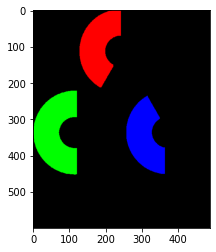

In [43]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2
import numpy as np

#1. 위의 이미지 경로를 이용하여 컬러 이미지 읽기
org_image = cv2.imread(image_path)
b,g,r = cv2.split(org_image)
height,org_width, channel = org_image.shape

#2.읽은 이미지와 동일 크기의 컬러 이미지를 new_image1 로 만들기-> 임의의 숫자로 컬러 이미지 생성함
new_image1 = np.full((height,org_width,channel),130, dtype=np.uint8)

#3. new_image1 를 x 축 방향으로 4등분하고 왼쪽부터 subimage 1, 2, 3, 4 라고 할때 다음과 같이 new_image1을 구성하기

#x축 방향으로 4등분하기
width = org_width//4
#org_image를 가지고 변형하는것이기에 org_image를 복사하여 진행하는게 쉽다 생각하여 복사함
new_image1 = org_image.copy()

#3-1. subimage 1 : 
#3-2. subimage 2 : Red만 
new_image1 [:, width:width*2, 0] =0
new_image1 [:, width:width*2, 1] =0

#3-3. subimage 3 : Bule만 
new_image1 [:, width*2:width*3, 1] =0
new_image1 [:, width*2:width*3, 2] =0

#3-4. subimage 4 : Green 만 
new_image1 [:, width*3:, 0] =0
new_image1 [:, width*3:, 2] =0

#4. new_image1 을 디스플레이하기
b,g,r = cv2.split(new_image1)
new_image1 = cv2.merge([r,g,b])
plt.imshow(new_image1)
plt.show()

## 문제 2: 식을 이용한 grayscale 이미지 만들기 

1. org_image와 같은 크기의 공백 grayscale 이미지 new_image2 만들기
2. org_image 의 각 화소를 접근하여 강의에서 설명한 공식을 사용하여 grayscale 값으로 변환하여 새로운 그레이스케일 이미지 new_image2 에 저장하기
2. new_image2 디스플레이하기 

[참조] https://stackoverflow.com/questions/17615963/standard-rgb-to-grayscale-conversion



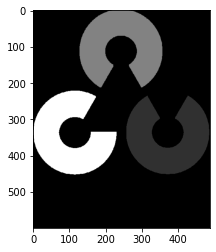

In [44]:
#1 org_image와 같은 크기의 공백 grayscale 이미지 new_image2 만들기
new_image2 = np.zeros((height, org_width,),dtype=np.uint8)


#2.org_image 의 각 화소를 접근하여  grayscale 값으로 변환하여 새로운 그레이스케일 이미지 new_image2 에 저장하기
for y in range(height):
  for x in range(org_width):
    B,G,R = org_image[y,x]
    gray = 0.299 * R + 0.587 *G + 0.114 *B
    #grayscale이라
    new_image2 [y, x] = gray


#3. new_image2 디스플레이하기
plt.imshow(new_image2, cmap="gray")
plt.show()

# 추가 생각한것..(?) 화소를 하나하나 접근하지 않고도
# 아래에 한번에 바뀌는걸 이렇게 할 수 있음! -> 문제가 있으니까 이렇게 안하는 거겠지???
# R,G,B = cv2.split(org_image)
# new_image2 = ((0.299 * R) + (0.587 *G) + (0.114 *B))